# <font color=violet> RNN-LSTM for regression and Classification- stock market prediction

#### <font color=red> This code run a RERESSION model using RECCURRENT NEURAL NETWORK (predictin stock return) and  CLASSIFICATION model using RNN (predicting the direction of the market using returns)

## <font color=pink> Import necessary libraries

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


## <font color=blue>  Load the data

In [36]:
dat=pd.read_csv('C:/Users/User/OneDrive/Desktop/dat.csv',sep=',')

In [37]:
dat.head()

,dates,Prices
0,2023-04-03 0:05,4124.5060
1,2023-04-03 0:10,4100.5990
2,2023-04-03 0:15,4090.3753
3,2023-04-03 0:20,4105.0187
4,2023-04-03 0:25,4109.1124


## <font color=blue> convert dates to datetime format

In [ ]:
dat['dates'] = pd.to_datetime(dat['dates'])
dat.set_index('dates', inplace=True)

## <font color=blue> Plot the stock prices

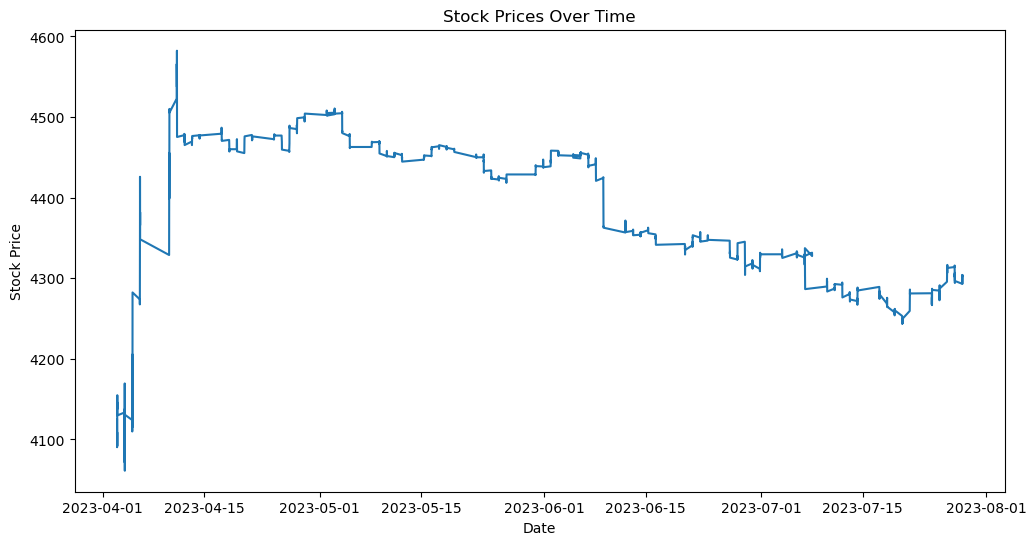

In [38]:
# Plot the stock prices
plt.figure(figsize=(12, 6))
plt.plot(dat['Prices'])
plt.title('Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.show()


## <font color=blue> Calculate returns

In [39]:
# Calculate returns
dat['Returns'] = dat['Prices'].pct_change().dropna()

## <font color=blue> Prepare the data for training

In [40]:
# Prepare the data for training
X = dat['Prices'].values.reshape(-1, 1)
y = dat['Returns'].values.reshape(-1, 1)

## <font color=blue> Scale the data

In [41]:
# Scale the data
scaler = MinMaxScaler(feature_range=(-1, 1))
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y)

## <font color=blue> Create sequences for the RNN

In [42]:
# Create sequences for the RNN
def create_sequences(data, seq_length):
    sequences = []
    targets = []
    for i in range(len(data) - seq_length):
        seq = data[i:i+seq_length]
        label = data[i+seq_length]
        sequences.append(seq)
        targets.append(label)
    return np.array(sequences), np.array(targets)


## <font color=blue> Define sequence length

In [43]:
# Define sequence length
seq_length = 10

## <font color=blue> Create sequences and targets

In [ ]:
# Create sequences and targets
X_seq, y_seq = create_sequences(X_scaled, seq_length)


## <font color=blue> Split the data into training and testing sets

In [44]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)


## <font color=blue> Build the RNN model

In [45]:
# Build the RNN model
model = Sequential([
    LSTM(units=50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(units=1)
])

model.compile(optimizer='adam', loss='mean_squared_error')


## <font color=blue> Train the model

In [46]:
# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/50
27/27 [==============================] - 3s 20ms/step - loss: 0.1082 - val_loss: 0.0449
Epoch 2/50
27/27 [==============================] - 0s 8ms/step - loss: 0.0112 - val_loss: 0.0047
Epoch 3/50
27/27 [==============================] - 0s 7ms/step - loss: 0.0028 - val_loss: 0.0040
Epoch 4/50
27/27 [==============================] - 0s 7ms/step - loss: 0.0025 - val_loss: 0.0041
Epoch 5/50
27/27 [==============================] - 0s 8ms/step - loss: 0.0025 - val_loss: 0.0037
Epoch 6/50
27/27 [==============================] - 0s 8ms/step - loss: 0.0023 - val_loss: 0.0036
Epoch 7/50
27/27 [==============================] - 0s 8ms/step - loss: 0.0024 - val_loss: 0.0036
Epoch 8/50
27/27 [==============================] - 0s 8ms/step - loss: 0.0022 - val_loss: 0.0036
Epoch 9/50
27/27 [==============================] - 0s 7ms/step - loss: 0.0023 - val_loss: 0.0036
Epoch 10/50
27/27 [==============================] - 0s 7ms/step - loss: 0.0022 - val_loss: 0.0034
Epoch 11/50
27/27 

## <font color=blue> Predict returns using the trained model

In [47]:
# Predict returns using the trained model
y_pred_scaled = model.predict(X_test)

# Inverse transform the scaled predictions
y_pred = scaler.inverse_transform(y_pred_scaled)
y_test_inv = scaler.inverse_transform(y_test)


7/7 [==============================] - 0s 3ms/step


## <font color=blue> Evaluate performance

In [48]:
# Evaluate performance
mse = mean_squared_error(y_test_inv, y_pred)
mad = mean_absolute_error(y_test_inv, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Deviation: {mad}")


Mean Squared Error: 9.073090958230995e-07
Mean Absolute Deviation: 0.00044965061397087496


## <font color=blue> Plot actual returns vs. predicted returns

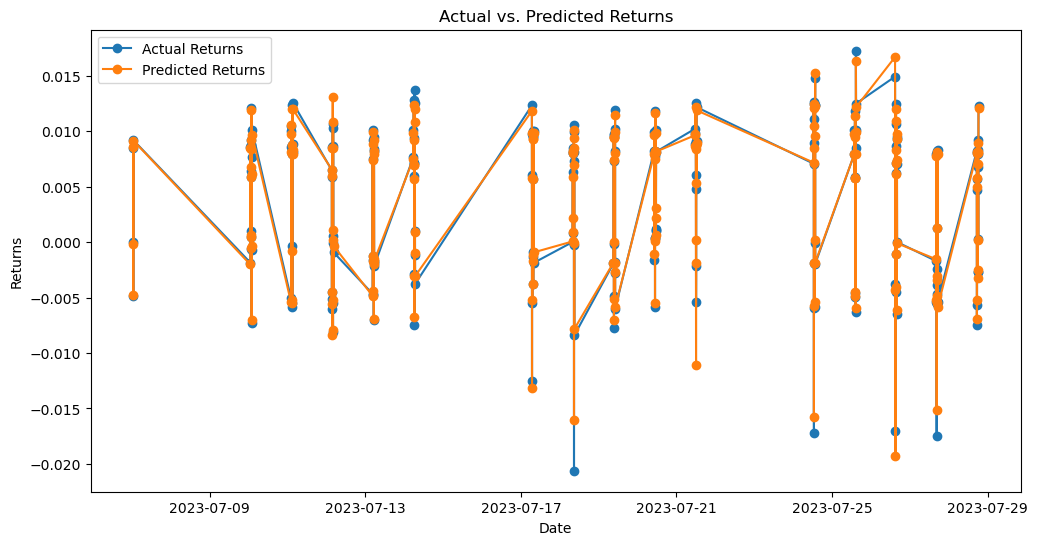

In [49]:
# Plot actual returns vs. predicted returns
plt.figure(figsize=(12, 6))
plt.plot(dat.index[-len(y_test):], y_test_inv, label='Actual Returns', marker='o')
plt.plot(dat.index[-len(y_test):], y_pred, label='Predicted Returns', marker='o')
plt.title('Actual vs. Predicted Returns')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.show()


## <font color=blue> Plot observed prices vs. predicted prices

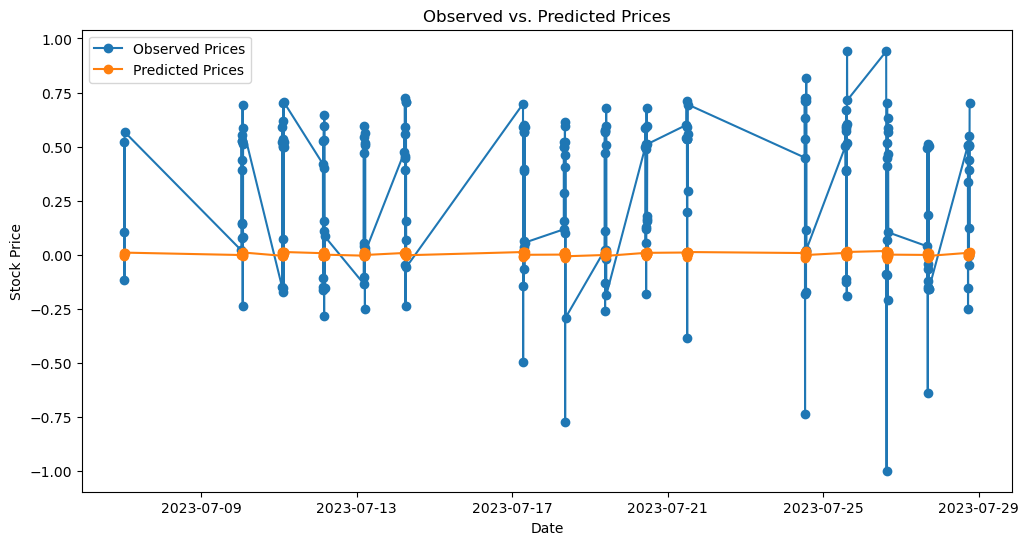

In [50]:
# Plot observed prices vs. predicted prices
plt.figure(figsize=(12, 6))
plt.plot(dat.index[-len(y_test):], X_test[:, -1, 0], label='Observed Prices', marker='o')
plt.plot(dat.index[-len(y_test):], y_pred, label='Predicted Prices', marker='o')
plt.title('Observed vs. Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


# <font color=red> Adding New columns to the dataset: "returns" and "direction" columns. Then re-run the RNN for - CLASSIFICATION PROBLEM

## <font color=blue> re-calling the necessary libraries

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


## <font color=blue> Load the data 

In [53]:
dat=pd.read_csv('C:/Users/User/OneDrive/Desktop/dat.csv',sep=',')
dat.head()

,dates,Prices
0,2023-04-03 0:05,4124.5060
1,2023-04-03 0:10,4100.5990
2,2023-04-03 0:15,4090.3753
3,2023-04-03 0:20,4105.0187
4,2023-04-03 0:25,4109.1124


## <font color=blue> convert dates to datetime format

In [54]:
# convert dates to datetime format

dat['dates'] = pd.to_datetime(dat['dates'])
dat.set_index('dates', inplace=True)

## <font color=blue> Create a new column for returns

In [55]:
# 1. Create a new column for returns
dat['returns'] = dat['Prices'].pct_change().fillna(0)

## <font color=blue> Add a new column for direction

In [56]:
# 2. Add a new column for direction
dat['direction'] = np.where(dat['returns'] < 0, -1, 1)


## <font color=blue> Display the dataset with the newly added columns

In [59]:
# 3. Display the dataset with the newly added columns
print("Dataset with Returns and Direction columns:")
dat.head()

Dataset with Returns and Direction columns:


,Prices,returns,direction
dates,,,
2023-04-03 00:05:00,4124.5060,0.000000,1
2023-04-03 00:10:00,4100.5990,-0.005796,-1
2023-04-03 00:15:00,4090.3753,-0.002493,-1
2023-04-03 00:20:00,4105.0187,0.003580,1
2023-04-03 00:25:00,4109.1124,0.000997,1


## <font color=blue> Prepare the data for training

In [60]:
# 4. Prepare the data for training
X = dat['returns'].values.reshape(-1, 1)
y = dat['direction'].values


## <font color=blue> Scale the data

In [61]:
# Scale the data
scaler = MinMaxScaler(feature_range=(-1, 1))
X_scaled = scaler.fit_transform(X)


## <font color=blue> Create sequences for the RNN

In [62]:
# Create sequences for the RNN
def create_sequences(data, seq_length):
    sequences = []
    targets = []
    for i in range(len(data) - seq_length):
        seq = data[i:i+seq_length]
        label = data[i+seq_length]
        sequences.append(seq)
        targets.append(label)
    return np.array(sequences), np.array(targets)


## <font color=blue> Define sequence length

In [63]:
# Define sequence length
seq_length = 10


## <font color=blue> Create sequences and targets

In [ ]:

# Create sequences and targets
X_seq, y_seq = create_sequences(X_scaled, seq_length)


## <font color=blue> Split the data into training and testing sets

In [64]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=42)


## <font color=blue> Build the RNN model

In [65]:
# Build the RNN model
model = Sequential([
    LSTM(units=50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(units=1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


## <font color=blue> Train the model

In [66]:
# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/50
27/27 [==============================] - 3s 21ms/step - loss: 0.6583 - accuracy: 0.0000e+00 - val_loss: 0.5937 - val_accuracy: 0.0000e+00
Epoch 2/50
27/27 [==============================] - 0s 7ms/step - loss: 0.4422 - accuracy: 0.0000e+00 - val_loss: 0.3647 - val_accuracy: 0.0000e+00
Epoch 3/50
27/27 [==============================] - 0s 8ms/step - loss: 0.3509 - accuracy: 0.0000e+00 - val_loss: 0.3680 - val_accuracy: 0.0000e+00
Epoch 4/50
27/27 [==============================] - 0s 8ms/step - loss: 0.3500 - accuracy: 0.0000e+00 - val_loss: 0.3605 - val_accuracy: 0.0000e+00
Epoch 5/50
27/27 [==============================] - 0s 8ms/step - loss: 0.3468 - accuracy: 0.0000e+00 - val_loss: 0.3582 - val_accuracy: 0.0000e+00
Epoch 6/50
27/27 [==============================] - 0s 8ms/step - loss: 0.3474 - accuracy: 0.0000e+00 - val_loss: 0.3564 - val_accuracy: 0.0000e+00
Epoch 7/50
27/27 [==============================] - 0s 8ms/step - loss: 0.3465 - accuracy: 0.0000e+00 - val_los

## <font color=blue> Predict direction using the trained model

In [67]:
# Predict direction using the trained model
y_pred_prob = model.predict(X_test)
y_pred_binary = (y_pred_prob > 0.5).astype(int)


7/7 [==============================] - 0s 3ms/step


## <font color=blue> Convert y_test to binary for classification metrics

In [68]:
# Convert y_test to binary for classification metrics
y_test_binary = (y_test > 0).astype(int)


## <font color=blue> Evaluate performance

In [69]:
# Evaluate performance
accuracy = accuracy_score(y_test_binary, y_pred_binary)
conf_matrix = confusion_matrix(y_test_binary, y_pred_binary)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.018691588785046728
Confusion Matrix:
[[  4   0]
 [210   0]]


## <font color=blue> Compute ROC curve and ROC area

In [70]:
# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test_binary, y_pred_prob)
roc_auc = auc(fpr, tpr)


## <font color=blue> Plot ROC curve

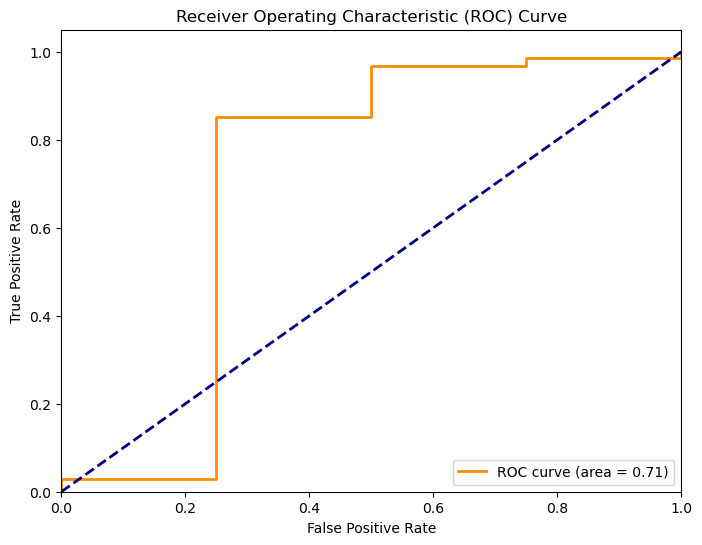

In [71]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
